In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [2]:
def calculate_signal(
    df,
    col,
    target_col,
    exposure_col=None,
):

    # aggregate
    _ = df.groupby(col, dropna=False, observed=0)
    if exposure_col is not None:
        _ = _.agg(
            count=(target_col, np.size),
            exposure=(exposure_col, "sum"),
            signal=(target_col, "sum"),
        )
        _.rename(columns={"signal": target_col, "exposure": exposure_col}, inplace=True)
    else:
        _ = _.agg(
            count=(target_col, np.size),
            signal=(target_col, "sum"),
        )
        _.rename(
            columns={
                "signal": target_col,
            },
            inplace=True,
        )

    # count based pct & rates
    _["count_pct"] = _["count"].div(_["count"].sum()).mul(100)
    _[f"{target_col}_pct"] = _[f"{target_col}"].div(_[f"{target_col}"].sum()).mul(100)
    _[f"{target_col}_rate"] = _[f"{target_col}"].div(_["count"]).mul(100)

    # exposure based pct & rates
    if exposure_col is not None:
        _[f"{exposure_col}_pct"] = _[exposure_col].div(_[exposure_col].sum()).mul(100)
        _[f"{target_col}_{exposure_col}_rate"] = (
            _[f"{target_col}"].div(_[exposure_col]).mul(100)
        )

    return _

In [3]:
def plot_bar_and_line(
    df, col, target_col, rotation=0, y_lim=(None,), y_lim2=(None,), ax2_y_lim=(None,)
):

    _ = df
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    x_ticks = _.index.astype(str)
    title = f"Histogram & {target_col} of {_.index.name}"

    def func(ax, word, y_lim=(None,), ax2_y_lim=(None,)):

        ax.bar(x_ticks, _[word])
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_ticks, rotation=rotation)
        ax.set_xlabel(_.index.name)
        ax.set_ylabel(word, loc="center")
        ax.set_ylim(*y_lim)
        ax.set_title(title)

        ax2 = ax.twinx()
        ax2.plot(x_ticks, _[target_col], color="red")
        ax2.set_ylabel(target_col, loc="bottom")
        ax2.set_ylim(*ax2_y_lim)

    func(ax[0], col, y_lim=y_lim, ax2_y_lim=ax2_y_lim)
    func(ax[1], f"{col}_pct", y_lim=y_lim2, ax2_y_lim=ax2_y_lim)

    plt.show()

### process

In [4]:
df = pd.read_csv("../toydata/titanic.csv")
print(f"{df.shape}")
df.head(1)

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


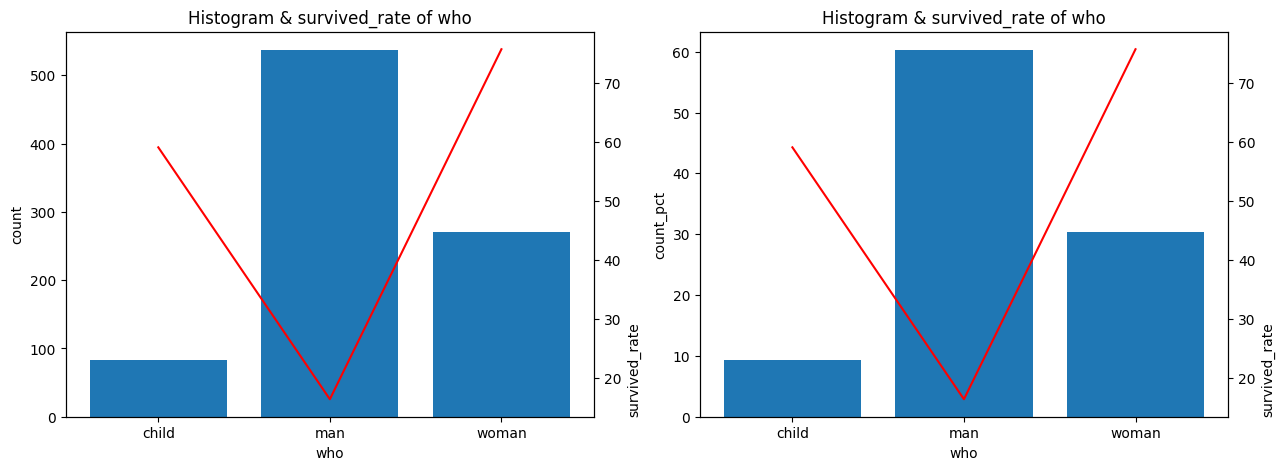

,count,survived,count_pct,survived_pct,survived_rate
who,,,,,
child,83,49,9.32,14.33,59.04
man,537,88,60.27,25.73,16.39
woman,271,205,30.42,59.94,75.65


In [30]:
_ = calculate_signal(df, target_col="survived", col="who")
plot_bar_and_line(_, col="count", target_col="survived_rate", rotation=0)
_.round(2)

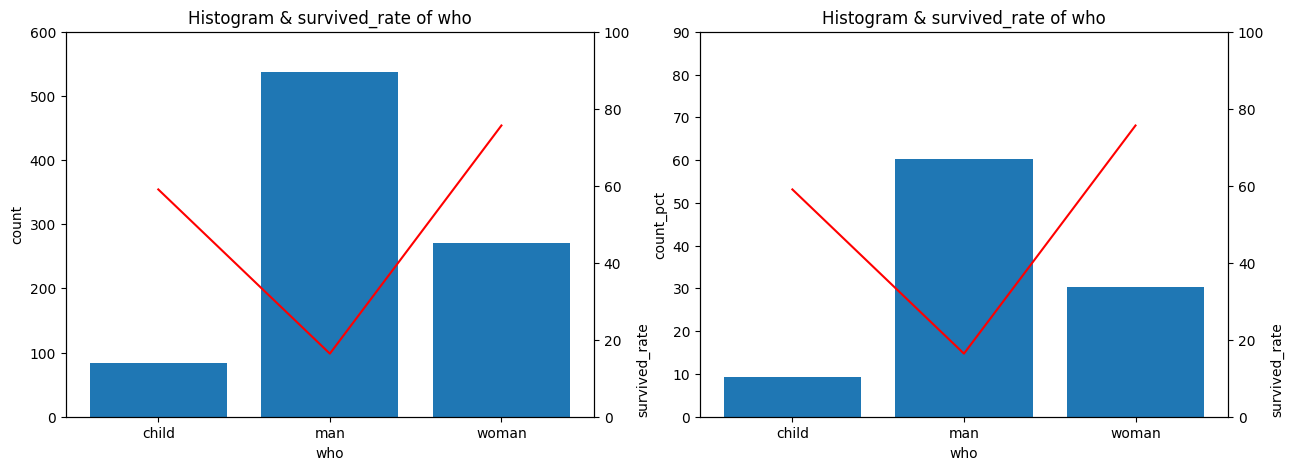

,count,survived,count_pct,survived_pct,survived_rate
who,,,,,
child,83,49,9.32,14.33,59.04
man,537,88,60.27,25.73,16.39
woman,271,205,30.42,59.94,75.65


In [18]:
_ = calculate_signal(df, target_col="survived", col="who")
plot_bar_and_line(
    _,
    col="count",
    target_col="survived_rate",
    rotation=0,
    y_lim=(0, 600),
    y_lim2=(0, 90),
    ax2_y_lim=(0, 100),
)
_.round(2)

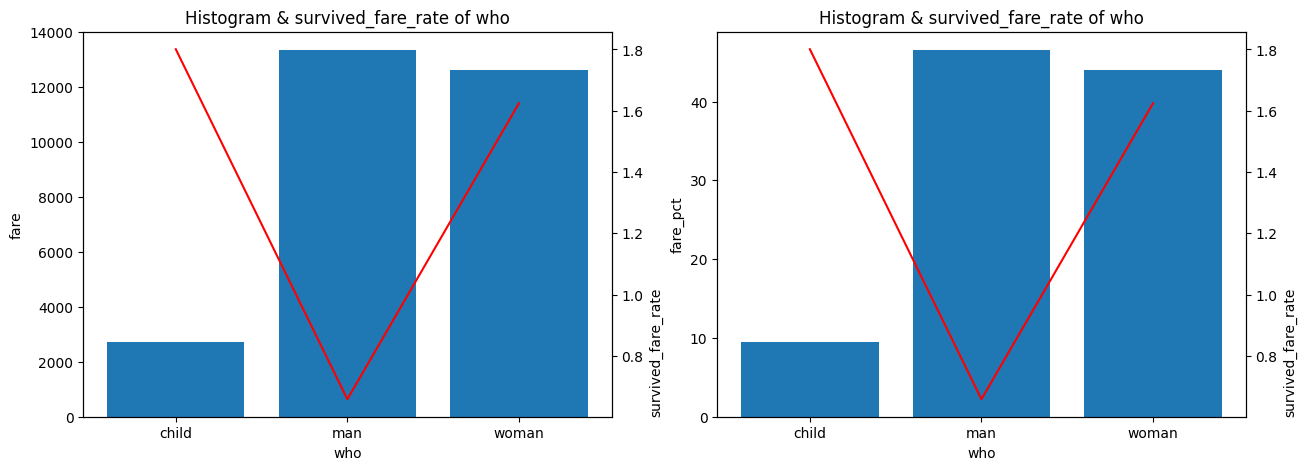

,count,fare,survived,count_pct,survived_pct,survived_rate,fare_pct,survived_fare_rate
who,,,,,,,,
child,83,2721.22,49,9.32,14.33,59.04,9.48,1.80
man,537,13352.07,88,60.27,25.73,16.39,46.53,0.66
woman,271,12620.66,205,30.42,59.94,75.65,43.98,1.62


In [28]:
_ = calculate_signal(df, target_col="survived", col="who", exposure_col="fare")
plot_bar_and_line(_, col="fare", target_col="survived_fare_rate", rotation=0)
_.round(2)

In [29]:
print(_)

        count  survived  count_pct  survived_pct  survived_rate
sex                                                            
female    314       233  35.241302     68.128655      74.203822
male      577       109  64.758698     31.871345      18.890815


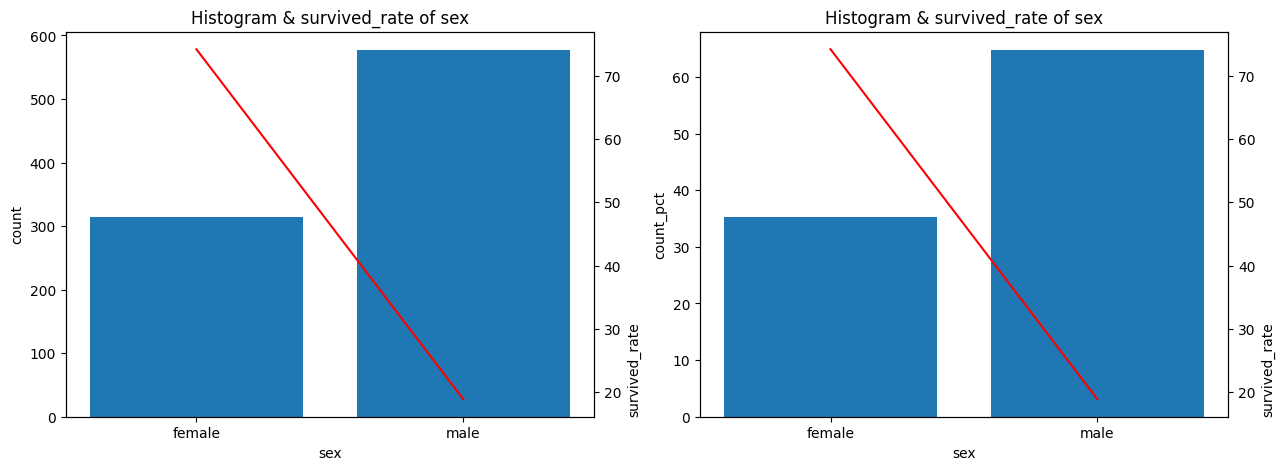

,count,survived,count_pct,survived_pct,survived_rate
sex,,,,,
female,314,233,35.24,68.13,74.20
male,577,109,64.76,31.87,18.89


In [33]:
_ = calculate_signal(df, target_col="survived", col="sex")
plot_bar_and_line(_, col='count',target_col="survived_rate", rotation=0)
_.round(2)

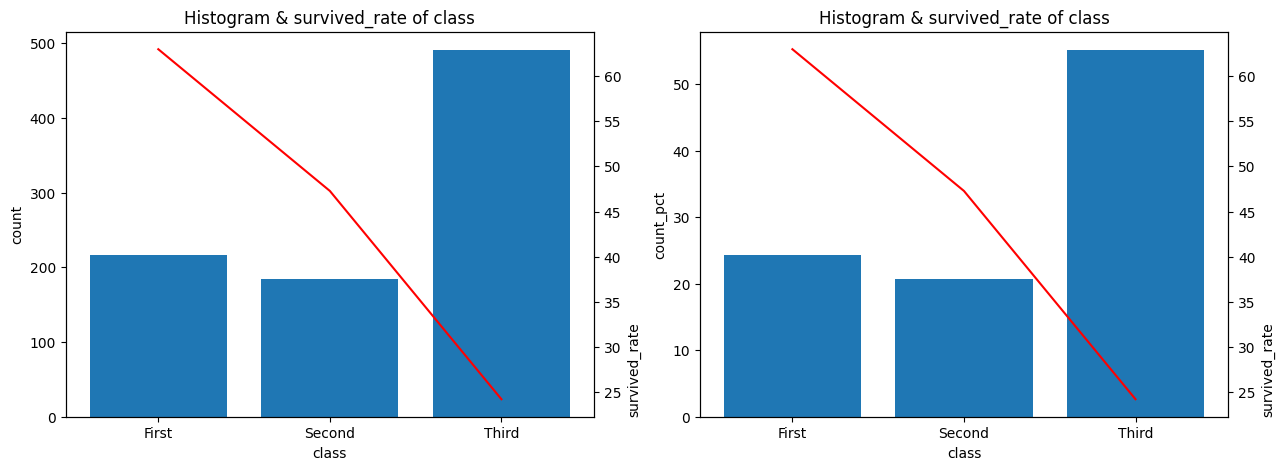

,count,survived,count_pct,survived_pct,survived_rate
class,,,,,
First,216,136,24.24,39.77,62.96
Second,184,87,20.65,25.44,47.28
Third,491,119,55.11,34.80,24.24


In [35]:
_ = calculate_signal(df, target_col="survived", col="class")
plot_bar_and_line(_, col="count", target_col="survived_rate", rotation=0)
_.round(2)

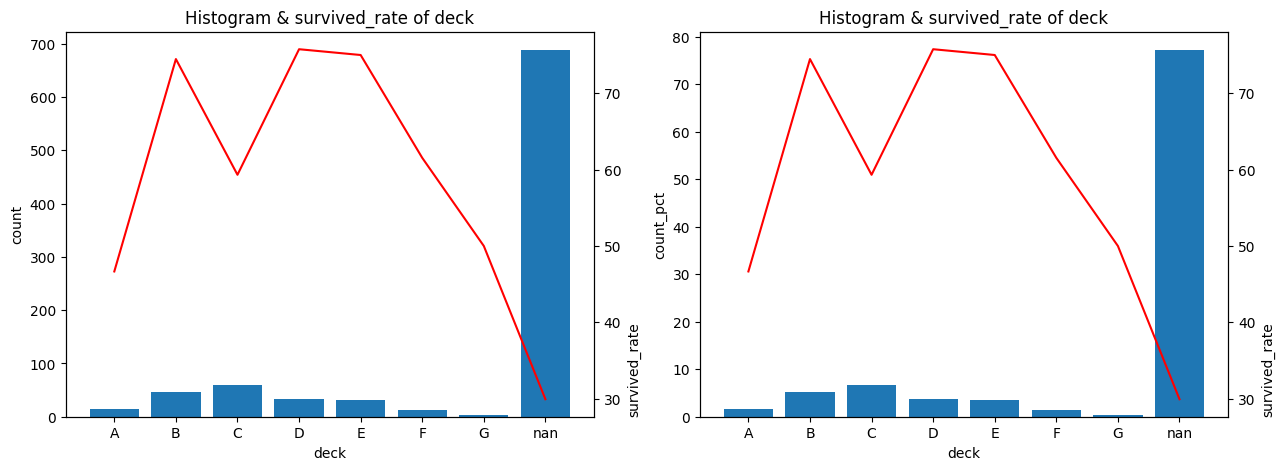

,count,survived,count_pct,survived_pct,survived_rate
deck,,,,,
A,15,7,1.68,2.05,46.67
B,47,35,5.27,10.23,74.47
C,59,35,6.62,10.23,59.32
D,33,25,3.70,7.31,75.76
E,32,24,3.59,7.02,75.00
F,13,8,1.46,2.34,61.54
G,4,2,0.45,0.58,50.00
NaN,688,206,77.22,60.23,29.94


In [36]:
_ = calculate_signal(df, target_col="survived", col="deck")
plot_bar_and_line(_, col="count", target_col="survived_rate", rotation=0)
_.round(2)

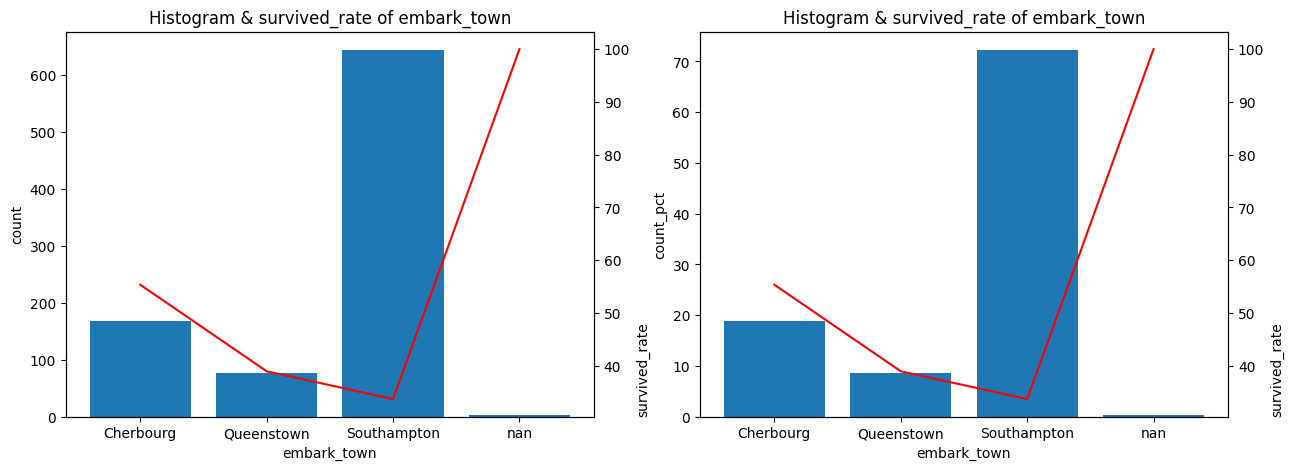

,count,survived,count_pct,survived_pct,survived_rate
embark_town,,,,,
Cherbourg,168,93,18.86,27.19,55.36
Queenstown,77,30,8.64,8.77,38.96
Southampton,644,217,72.28,63.45,33.70
NaN,2,2,0.22,0.58,100.00


In [37]:
_ = calculate_signal(df, target_col="survived", col="embark_town")
plot_bar_and_line(_, col="count", target_col="survived_rate", rotation=0)
_.round(2)

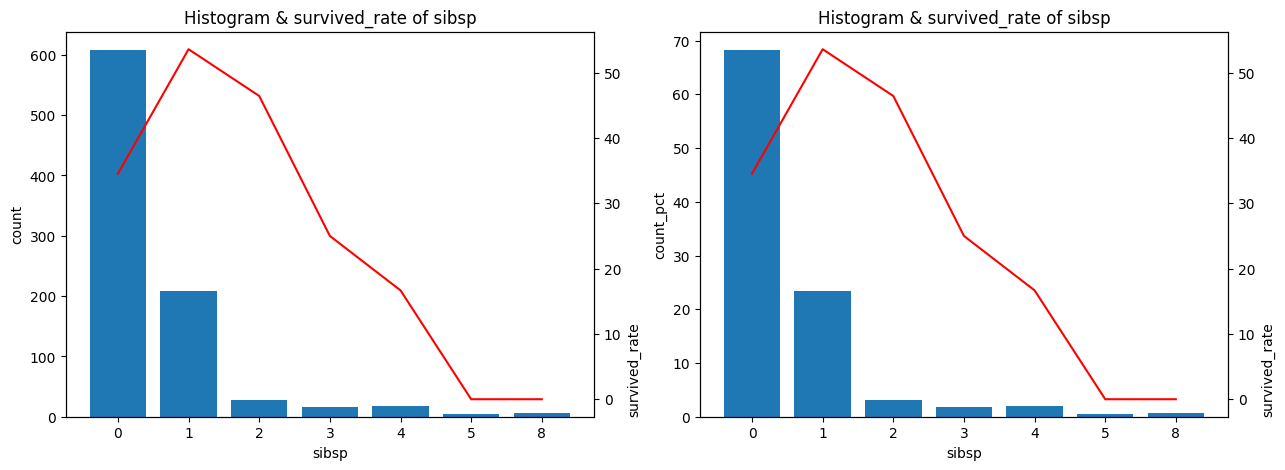

,count,survived,count_pct,survived_pct,survived_rate
sibsp,,,,,
0,608,210,68.24,61.40,34.54
1,209,112,23.46,32.75,53.59
2,28,13,3.14,3.80,46.43
3,16,4,1.80,1.17,25.00
4,18,3,2.02,0.88,16.67
5,5,0,0.56,0.00,0.00
8,7,0,0.79,0.00,0.00


In [38]:
_ = calculate_signal(df, target_col="survived", col="sibsp")
plot_bar_and_line(_, col="count", target_col="survived_rate", rotation=0)
_.round(2)

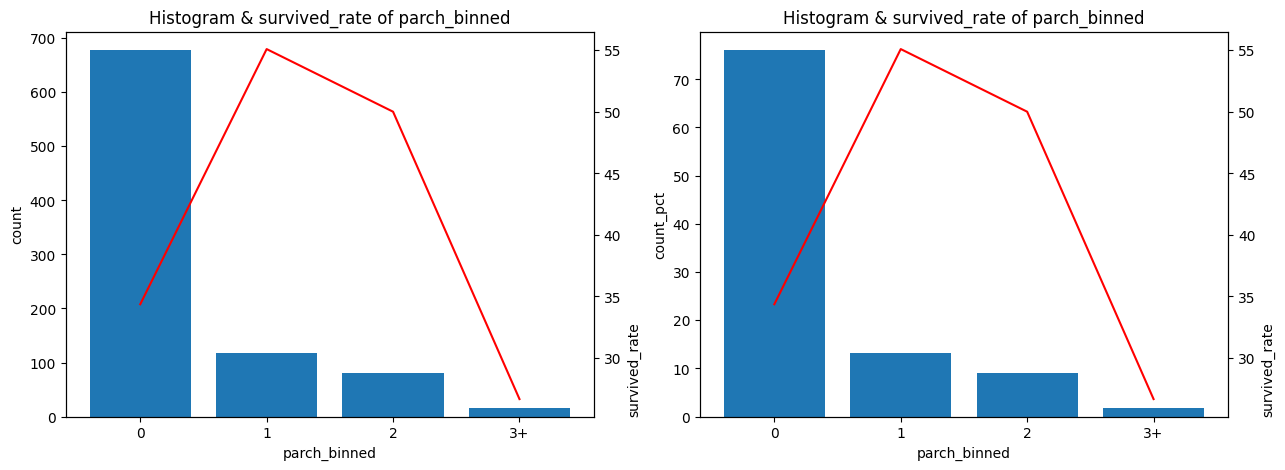

,count,survived,count_pct,survived_pct,survived_rate
parch_binned,,,,,
0,678,233,76.09,68.13,34.37
1,118,65,13.24,19.01,55.08
2,80,40,8.98,11.70,50.00
3+,15,4,1.68,1.17,26.67


In [39]:
idx = df.eval("parch >= 3")
df["parch_binned"] = df["parch"].astype(str)
df.loc[idx, "parch_binned"] = "3+"
_ = calculate_signal(df, target_col="survived", col="parch_binned")
plot_bar_and_line(_, col="count", target_col="survived_rate", rotation=0)
_.round(2)

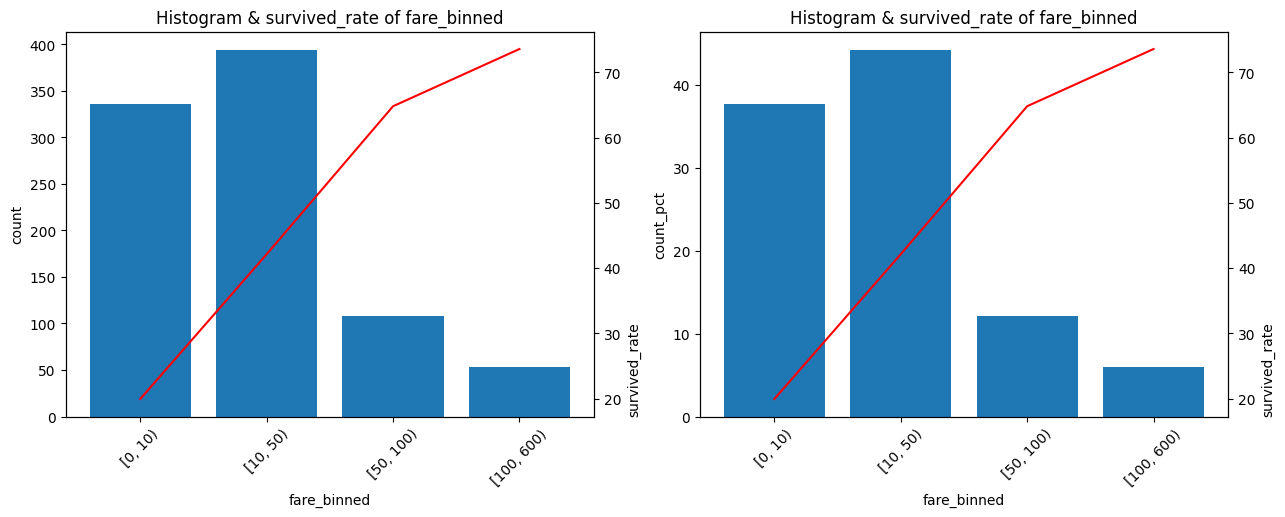

,count,survived,count_pct,survived_pct,survived_rate
fare_binned,,,,,
"[0, 10)",336,67,37.71,19.59,19.94
"[10, 50)",394,166,44.22,48.54,42.13
"[50, 100)",108,70,12.12,20.47,64.81
"[100, 600)",53,39,5.95,11.40,73.58


In [40]:
edges = np.histogram_bin_edges(df["fare"].dropna(), bins=[0, 10, 50, 100, 600])
df["fare_binned"] = pd.cut(df["fare"], bins=edges, right=False)
_ = calculate_signal(df, target_col="survived", col="fare_binned")
plot_bar_and_line(_, col="count", target_col="survived_rate", rotation=45)
_.round(2)

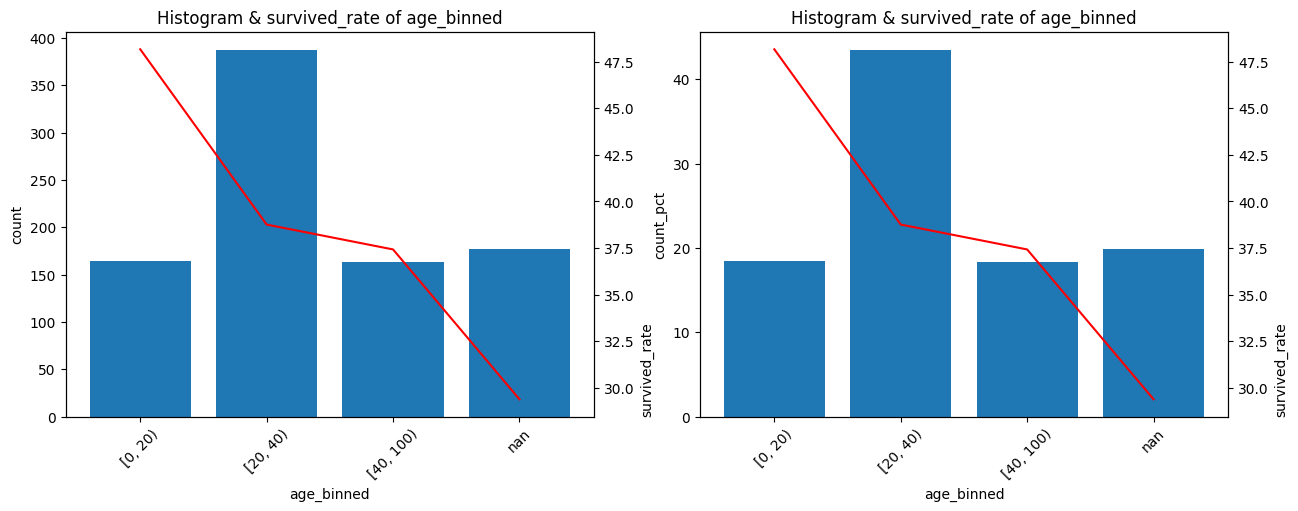

,count,survived,count_pct,survived_pct,survived_rate
age_binned,,,,,
"[0.0, 20.0)",164,79,18.41,23.10,48.17
"[20.0, 40.0)",387,150,43.43,43.86,38.76
"[40.0, 100.0)",163,61,18.29,17.84,37.42
NaN,177,52,19.87,15.20,29.38


In [41]:
edges = [0, 20, 40, 100]
df["age_binned"] = pd.cut(df["age"], bins=edges, right=False)
_ = calculate_signal(df, target_col="survived", col="age_binned")
plot_bar_and_line(_, col="count", target_col="survived_rate", rotation=45)
_.round(2)

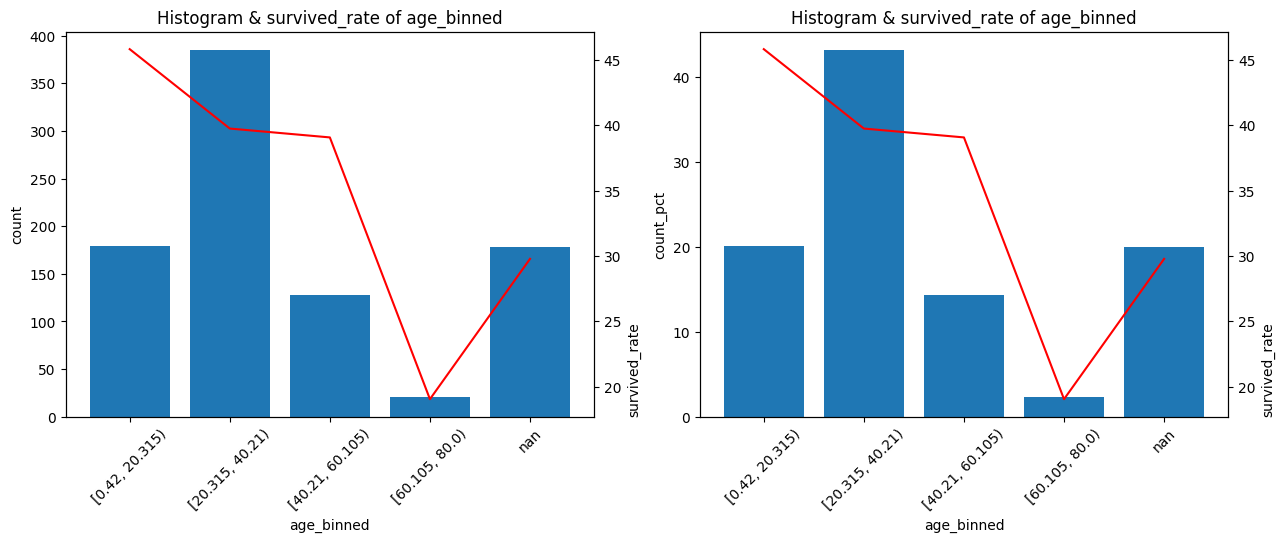

,count,survived,count_pct,survived_pct,survived_rate
age_binned,,,,,
"[0.42, 20.315)",179,82,20.09,23.98,45.81
"[20.315, 40.21)",385,153,43.21,44.74,39.74
"[40.21, 60.105)",128,50,14.37,14.62,39.06
"[60.105, 80.0)",21,4,2.36,1.17,19.05
NaN,178,53,19.98,15.50,29.78


In [42]:
edges = np.histogram_bin_edges(df["age"].dropna(), bins=4)
df["age_binned"] = pd.cut(df["age"], bins=edges, right=False)

_ = calculate_signal(df, target_col="survived", col="age_binned")
plot_bar_and_line(_, col="count",target_col="survived_rate", rotation=45)
_.round(2)

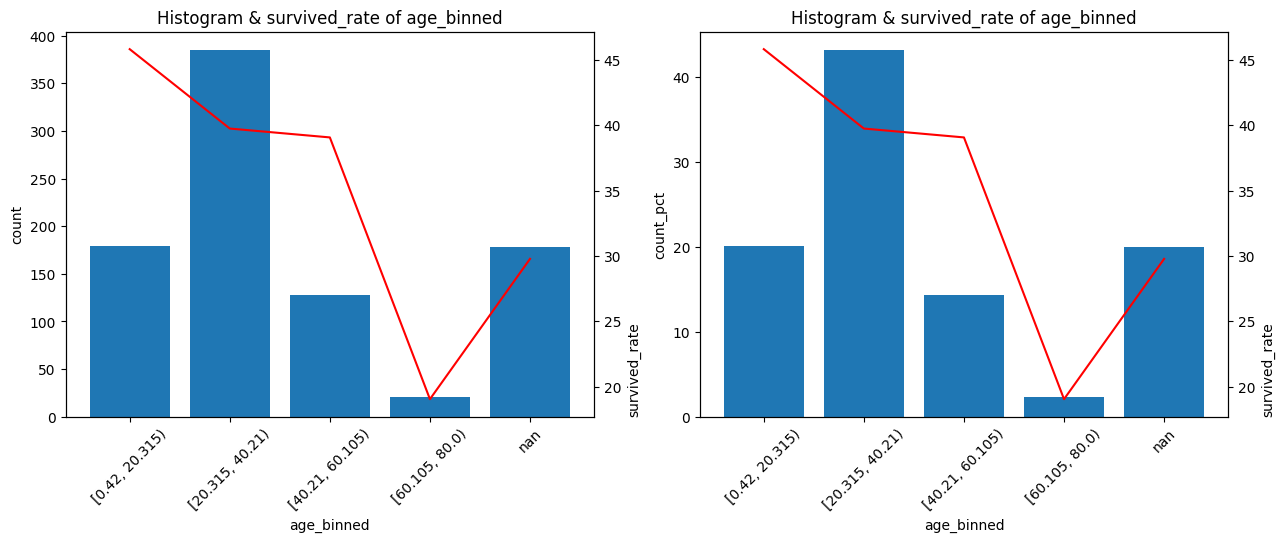

,count,survived,count_pct,survived_pct,survived_rate
age_binned,,,,,
"[0.42, 20.315)",179,82,20.09,23.98,45.81
"[20.315, 40.21)",385,153,43.21,44.74,39.74
"[40.21, 60.105)",128,50,14.37,14.62,39.06
"[60.105, 80.0)",21,4,2.36,1.17,19.05
NaN,178,53,19.98,15.50,29.78


In [44]:
# more processing
df["age_binned"] = None
df.loc[df['age'].isna(), "age_binned"] = None
df.loc[df['age'] >= 100, "age_binned"] = "100+"
df.loc[df['age'] < 0, "age_binned"] = "<0"
idx_rest = (df['age'] >= 0) & (df['age'] < 100) & (df['age'].notna())
edges = np.histogram_bin_edges(df.loc[idx_rest, "age"], bins=4)
df.loc[idx_rest, "age_binned"] = pd.cut(df.loc[idx_rest, "age"], bins=edges, right=False)

_ = calculate_signal(df, target_col="survived", col="age_binned")
plot_bar_and_line(_, col="count", target_col="survived_rate", rotation=45)
_.round(2)